## Guided Project: Popular Data Science Questions
The goal of this project is to find content that is interesting for designing a data science education service. We'll be looking through the [Data Science Stack Exhange](https://datascience.stackexchange.com/) website for popular subjects that interests people. With the subjects we find, we can potentially include them when we create content for our service.

## Stack Exchange

__What kind of questions are welcomed on this site?__

In the help center of the DSSE website, we can read that we should:

- Avoid asking subjective questions
- Ask practical questions about Data Science.
- Ask specific questions and reasonably scoped questions.
- Make questions relevant to others.

These types of questions will allow for us to sufficiently see what kind of questions people are wanting to learn about, and will be useful for our goal.

__What, other than questions, does the site's home subdivide into?__

Besides the [home](https://datascience.stackexchange.com/), we can see that DSSE is divided into four other sections which includes:
- [Questions](https://datascience.stackexchange.com/questions)

- [Tags](https://datascience.stackexchange.com/tags) to sub-topics that includes:
    - Machine learning
    - Python
    - Neural network
    - Deep learning
    - Classification
    - Keras
    - And many more...

- [Users](https://datascience.stackexchange.com/users)
- [Unanswered](https://datascience.stackexchange.com/unanswered)

The most useful section may be the `Tags` section, while the least useful sections are the `Unanswered` and `Users` sections.

__ What information is available in each post?__

Looking at the most upvoted topics in DSSE, I can see that a `User` can post an in-depth question asking for guidance or explanations about a problem they wish to know more about, more explicitly, a problem in which they are working on.

Each post includes:
- Post Title
- Post Author
- Question(s)
- Post Score
- Other User's responses
- Date of the post
- The last active time on post
- How much the post has been viewed
- How many times the post has been Favorited

## Stack Exchange Data Explorer

In order to find data we need about DSSE, we will be using the [Stack Exhange Data Explorer](https://data.stackexchange.com/datascience/query/new). The data explorer is a website that allows you to query into the DSSE databse using [Transact-SQL](https://en.wikipedia.org/wiki/Transact-SQL). While exploring and experimenting with the Data Explorer, I believe the most useful table to query is the `Posts` table.

The `Posts` Table includes:
- Id
- PostTypeId 
- Score
- ViewCount
- Tags
- CreationDate
- AnswerCount
- FavoriteCount

These are the columns I believe will be the most useful in achieving the goal. `PostTypeId` can help us determine Between a question or an answer. `Score`, `ViewCount`, `Title`, `AnswerCount`, `FavoriteCount` will give us a popularity gauge. `Tags` will show us sub-topics about that are ppopular within a post. `CreationDate` will help us determine the time frame in which these questions will ask so we will be able to see what are popular questions as of late.

## Getting the Data

Running the following code below in Data Explorer, will provide the data we need to accomplish our goal.

`SELECT 
  Id,
  CreationDate,
  Score,
  ViewCount,
  Tags,
  AnswerCount,
  FavoriteCount
FROM posts
WHERE PostTypeId = 2 AND YEAR(CreationDate) = 2019;`

We can save the results of this query from the Data Explorer as a .csv file so we can explore the data.

## Exploring the Data

In [1]:
# Read in libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [2]:
# Explore/Observe the Dataset
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


There is 72% of missing data from the `FavoriteCount` column, which also seems to be the only column with missing data. A missing valuein this may indicate that the question is not present in any person's favorite list. We can replace the missing values with a zero, and change the column type to `int` since it no longer needs to be type `float`.

The `Tags` column as data type object, let's determine what what `types` the `objects` in `questions["Tag"]` are.

In [3]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

The `Tags` column are all type string. Each post in Stack exchange are limited to a maximum of five tags. In our dataframe, we could separate our `Tags` column into five columns (one for each tag), however this method doesn't seem useful so we can keep it as a list of strings.

Fortunately, Stack Exchange's Data explorer provided clean data. Other than these two columns, the rest of the data seems to be of adequate data types and no other data are missing.

## Cleaning the Data

In [4]:
# Fill in the `FavoriteCount` column with zeros
questions.fillna(value ={"FavoriteCount":0}, inplace=True)

# Change the datatype of the `FavoriteCount` column
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)

# Print information on the dataset
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


The `Tags` column looks like the following:

In [5]:
print(questions.Tags.to_string(index=False))

<machine-learning><data-mining>
<machine-learning><regression><linear-regressi...
     <python><time-series><forecast><forecasting>
            <machine-learning><scikit-learn><pca>
         <dataset><bigdata><data><speech-to-text>
                                    <fuzzy-logic>
<time-series><anomaly-detection><online-learning>
                           <matrix-factorisation>
            <correlation><naive-bayes-classifier>
<machine-learning><python><deep-learning><kera...
                               <machine-learning>
                       <machine-learning><theory>
             <machine-learning><gradient-descent>
<nlp><clustering><feature-extraction><encoding...
            <python><scikit-learn><pandas><numpy>
<python><scikit-learn><decision-trees><accurac...
                                 <python><pandas>
                   <python><deep-learning><keras>
<machine-learning><reinforcement-learning><q-l...
<neural-network><deep-learning><image-classifi...
         <r><logis

The list of `Tags` contain `<` and `>` as separators. We can transform this list of string to look more suitable.

In [6]:
# replace separators in the Tags columns
questions["Tags"] = questions["Tags"].str.replace("^<|>$","").str.split("><")
questions.sample(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
1938,57991,2019-08-22 06:10:48,0,25,"[feature-selection, feature-extraction, pca, d...",0,1
7614,64877,2019-12-15 14:07:37,1,47,[python],1,1
5639,52289,2019-05-20 23:20:04,0,106,"[machine-learning, neural-network, clustering]",4,0
77,55937,2019-07-18 16:15:07,0,24,"[machine-learning, python, deep-learning, data...",0,0
894,45427,2019-02-12 05:08:24,2,55,"[r, predictive-modeling, machine-learning-mode...",0,0


## Most Used and Most Viewed Tags

In this section we will look at how man times a tag has been used and viewed

In [7]:
# Create empty dictionary to keep track of count
tag_count = dict()

# Loop to create count for tag_count dict
for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [8]:
# Change aesthetics of tag_count
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0:"Count"}, inplace=True)
tag_count.head(7)

,Count
matrix,22
forecast,34
ridge-regression,7
grid-search,35
non-convex,1
caffe,7
cosine-distance,21


In [9]:
# Sort the Count by value
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


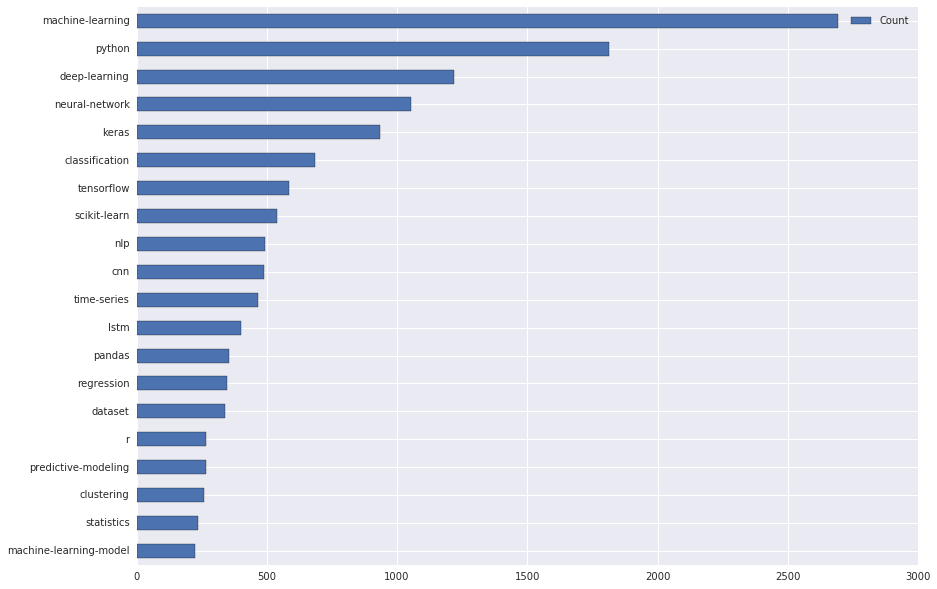

In [10]:
# Visualize the tags counted
most_used.plot(kind="barh", figsize=(14,10))

Showing a view of 20 tags is not necessary and some tags may not be as much use. This should be enough tags to accomplish our goal.

For the next part where we want to see the times each tag is viewed, we can use Python's builtin `enumerate()` function. Its utility is well understood by seeing it action.

In [11]:
some_iteration = "Iterate"

for i, c in enumerate(some_iteration):
    print(i, c)

0 I
1 t
2 e
3 r
4 a
5 t
6 e


The `enumerate()` function prints the `element` and the `index` of each of them.

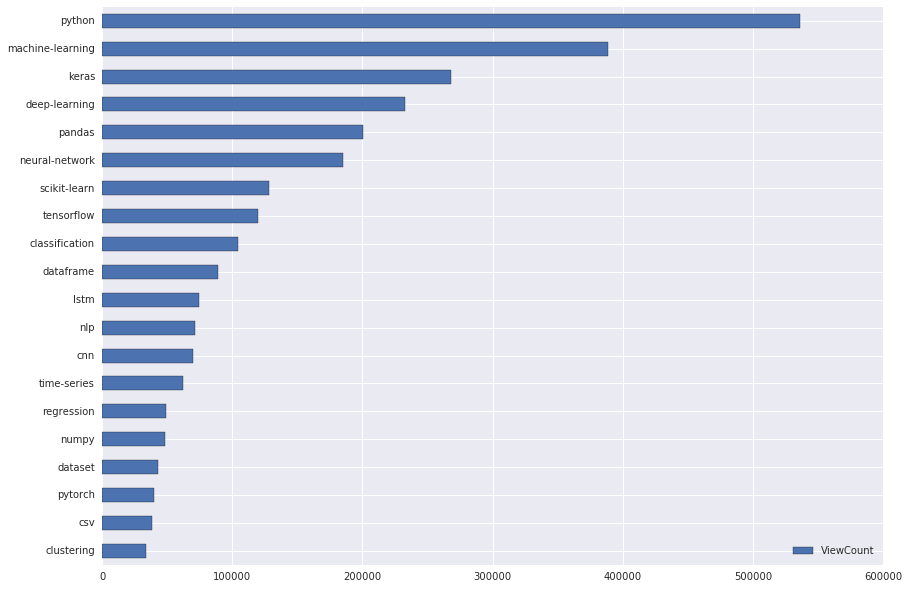

In [12]:
# Dictionary for tag view count
tag_view_count = dict()

# Loop through Tags and count the views
for idx, tags in enumerate(questions["Tags"]):
    for tag in tags:
        if tag in tag_view_count:
            tag_view_count[tag] += questions["ViewCount"].iloc[idx]
        else:
            tag_view_count[tag] = 1

# Modify the aesthetic
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0:"ViewCount"}, inplace=True)

# Sort the data
most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

# Create plot of the data
most_viewed.plot(kind="barh", figsize=(14, 10))

Let's view them side by side.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f77fff8dac8>],
      dtype=object)

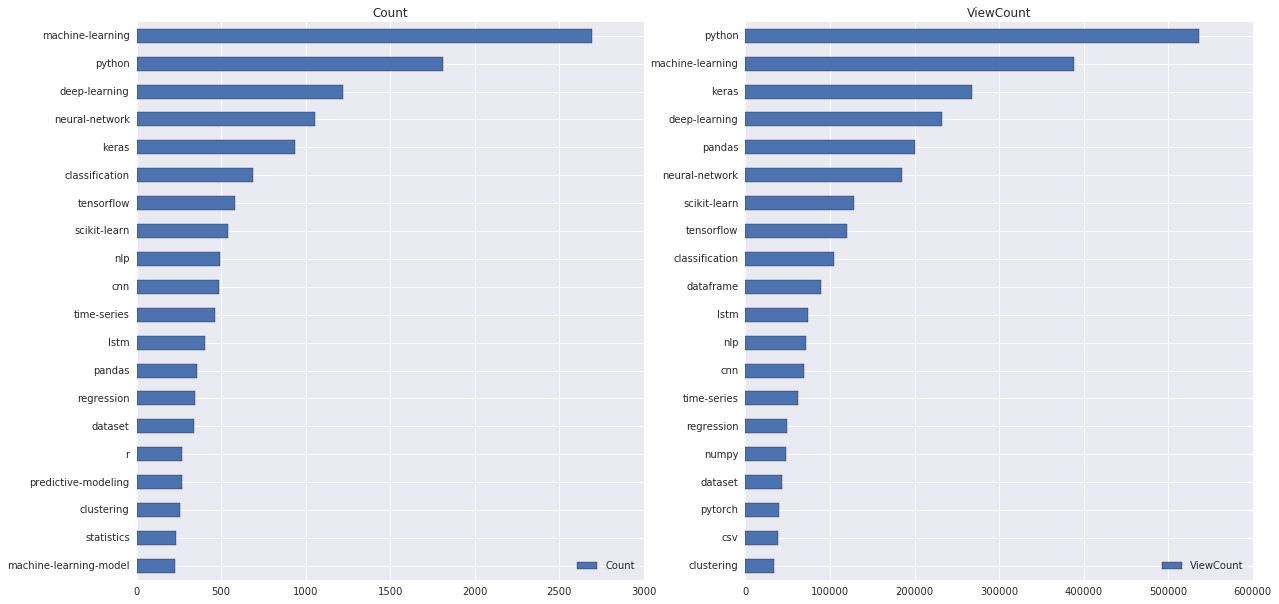

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols=2)
fig.set_size_inches((20,10))
most_used.plot(kind="barh", ax=axs[0], subplots=True)
most_viewed.plot(kind="barh", ax=axs[1], subplots=True)

In [14]:
# Merging the two data of tags together
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

In [15]:
print(in_used)

                        Count  ViewCount
machine-learning-model    224        NaN
statistics                234        NaN
clustering                257    33824.0
predictive-modeling       265        NaN
r                         268        NaN
dataset                   340    43133.0
regression                347    49427.0
pandas                    354   200576.0
lstm                      402    74407.0
time-series               466    62484.0
cnn                       489    69766.0
nlp                       493    71278.0
scikit-learn              540   128056.0
tensorflow                584   119560.0
classification            685   104397.0
keras                     935   268025.0
neural-network           1055   185342.0
deep-learning            1220   233045.0
python                   1814   535935.0
machine-learning         2693   388479.0


In [16]:
print(in_viewed)

                   Count  ViewCount
clustering         257.0      33824
csv                  NaN      38453
pytorch              NaN      39887
dataset            340.0      43133
numpy                NaN      48556
regression         347.0      49427
time-series        466.0      62484
cnn                489.0      69766
nlp                493.0      71278
lstm               402.0      74407
dataframe            NaN      89281
classification     685.0     104397
tensorflow         584.0     119560
scikit-learn       540.0     128056
neural-network    1055.0     185342
pandas             354.0     200576
deep-learning     1220.0     233045
keras              935.0     268025
machine-learning  2693.0     388479
python            1814.0     535935


## Relations Between Tags

A way of trying to gauge how pairs of tags are related to each other, is to count how many times teach tag appears with another.

We can first create a list of all the tags.

In [17]:
# List of all tags
all_tags = list(tag_count.index)

In [18]:
# List of all the tags
print(all_tags)

['matrix', 'forecast', 'ridge-regression', 'grid-search', 'non-convex', 'caffe', 'cosine-distance', 'gridsearchcv', 'pickle', 'multi-output', 'finance', 'algorithms', 'label-flipping', 'pip', 'probabilistic-programming', 'sequence-to-sequence', 'data', '3d-object-detection', 'mse', 'bayesian-networks', 'mean-shift', 'tableau', 'svm', 'named-entity-recognition', 'computer-vision', 'weight-initialization', 'regression', 'categories', 'clustering', 'multi-instance-learning', 'crawling', 'movielens', 'parameter', 'vae', 'map-reduce', 'labels', 'knime', 'scalability', 'beginner', 'discounted-reward', 'label-smoothing', 'pgm', 'domain-adaptation', 'aws', 'convergence', 'predict', 'generalization', 'association-rules', 'recommender-system', 'arima', 'feature-extraction', 'predictor-importance', 'jaccard-coefficient', 'market-basket-analysis', 'pytorch-geometric', 'spearmans-rank-correlation', 'colab', 'performance', 'graphical-model', 'feature-engineering', 'refit-model', 'multivariate-distri

We can now create a dataframe where each row will represent a tag, and each column will also represent a tag.

In [19]:
# Dataframe with index and columns are tags
tag_associations = pd.DataFrame(index=all_tags, columns=all_tags)

# Print out what the Dataframe looks like
tag_associations.iloc[0:4,0:4]

,matrix,forecast,ridge-regression,grid-search
matrix,NaN,NaN,NaN,NaN
forecast,NaN,NaN,NaN,NaN
ridge-regression,NaN,NaN,NaN,NaN
grid-search,NaN,NaN,NaN,NaN


First we fill this dataframe with zeroes and then, for each lists of tags in `questions["Tags"]`, we will increment the intervening tags by one. The result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [20]:
tag_associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    tag_associations.loc[tags, tags] += 1

Let's focus our attention on the most used tags. We'll add some colors to make it easier to talk about the dataframe.

In [21]:
relations_most_used = tag_associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


The cells highlighted in yellow tell us that `time-series` was used together with `r` 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that `machine-learning` was used `2693` times and we confirm it in this dataframe.

It is difficult to understand what is going on in this dataframe. We can try to create a heatmap as a visualization to simplify the complexity. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed, and it will misrepresent the data in the visualization

In [24]:
# set the blue values to NaN
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

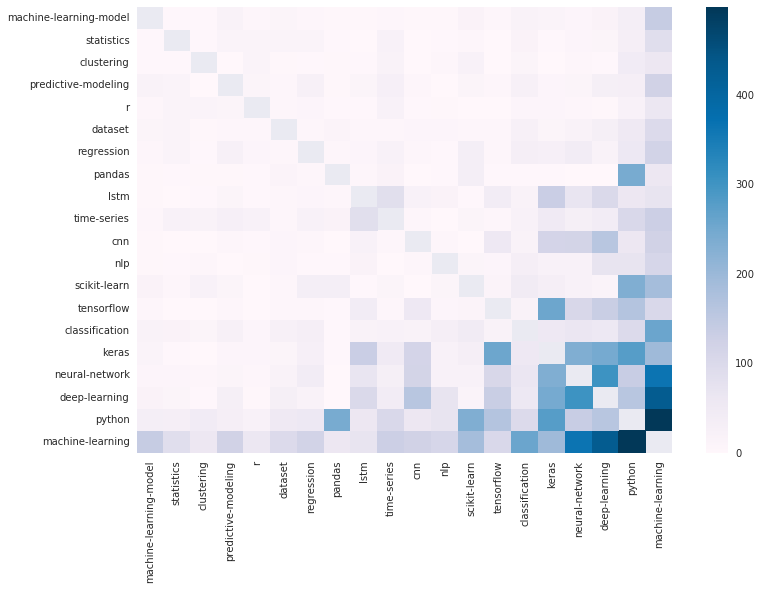

In [33]:
# Create a heatmap for the tags
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="PuBu", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between each other.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

## Enter Domain Knowledge

Doing some research and digging deeper, we find that `keras`, `TensorFlow`, and `sci-kit learn` are libraries used in `Python` to employ `deep-learning` (which is a type of `neural network` and and extension of `machine learning`).

If we wanted to create a course around these top tags, we could recommend a course in Python with a focus on machine learning that extends into deep learning for the usage of classification.

## It is just a Fad?